In [1]:
pip install niapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split ,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import make_classification
import numpy as np 
SEED = 1412 

In [5]:
X,y = make_classification(n_samples=10000,n_features=5,n_informative=2,n_classes=2,n_clusters_per_class=1,flip_y=0.2,shuffle=False,random_state=SEED)

In [6]:
print(type(X),type(y))
print(np.shape(X),np.shape(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10000, 5) (10000,)


In [7]:
My_df = pd.DataFrame(X)
My_df['Answer'] = y 
My_df.head()

,0,1,2,3,4,Answer
0,0.533273,0.819977,-0.951346,0.056317,0.104183,0
1,2.355706,0.729445,-1.502328,1.040854,-1.897134,1
2,0.191484,1.037704,-1.035397,-0.183296,-1.695266,0
3,1.451625,1.204866,-1.630845,0.434561,0.961220,0
4,-0.501209,0.631813,-0.414981,-0.436951,0.631393,0


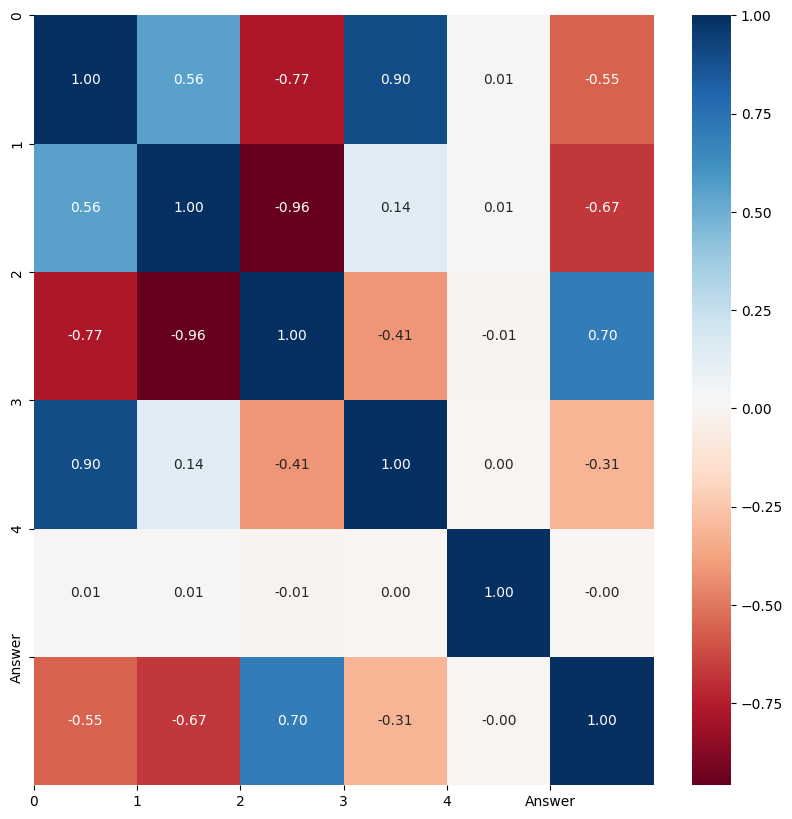

In [8]:
corr = My_df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns)
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

DTC_ = DecisionTreeClassifier()
SDGC_ = SGDClassifier()
RFC_ = RandomForestClassifier()

In [11]:
mdl = RFC_
mdl.fit(X_train,y_train)
val = mdl.score(X_test,y_test)
val

0.86

split 1

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from niapy.problems import Problem
from niapy.task import OptimizationType, Task


def get_hyperparameters(x):
    """
    Function to get hyperparameters from x value.
    base_estimator, n_estimators, learning_rate, and loss
    """
    print(f'x -> \n{x}')
    
    bases = (DTC_, SDGC_, RFC_)
    base_estimator = bases[int(x[0] * (len(bases)-1))]
    n_estimators = int(x[1] * 100 + 1)
    learning_rate = x[2] * 3 + 0.000001
    #algorithms = ('SAMME', 'SAMME.R')
    #algorithm = algorithms[int(x[3] * (len(algorithms)-1))]
#base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None

    params = {
        'base_estimator': base_estimator,
        'n_estimators': n_estimators,
        'learning_rate' : learning_rate,
        'algorithm': 'SAMME',
    }
    print(f'Para -> \n{params}')

    return params


def get_classifier(x):
    """     generate regressor berdasarkan hyperparameter yang dipilih.     """
    params = get_hyperparameters(x)
    return AdaBoostClassifier(**params)

In [13]:
class ABRHyperparameterOptimization(Problem):
    def __init__(self, X_train, y_train):
        super().__init__(dimension=4, lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train

    def _evaluate(self, x):
        model = get_classifier(x)
        scores = cross_val_score(model, self.X_train, self.y_train, cv=5, n_jobs=-1)
        return scores.mean()

In [14]:
problem = ABRHyperparameterOptimization(X_train, y_train)

task = Task(problem, max_iters=100, optimization_type=OptimizationType.MAXIMIZATION)


In [16]:
from niapy.algorithms.modified import HybridBatAlgorithm, SelfAdaptiveBatAlgorithm
from niapy.algorithms.basic import BatAlgorithm, FireflyAlgorithm, GreyWolfOptimizer


In [17]:
from niapy import Runner


In [ ]:
runner = Runner(
dimension=40,
max_evals=100,
runs=2,
algorithms=[
GreyWolfOptimizer(),
HybridBatAlgorithm(),
SelfAdaptiveBatAlgorithm(),
BatAlgorithm(),
FireflyAlgorithm()],
problems=[
problem
])
runner.run(export='json', verbose=True)


In [ ]:
break

In [ ]:

algorithm = HybridBatAlgorithm(population_size=10, seed=SEED)
best_params_HBA, best_accuracy = algorithm.run(task)
 
print('Best parameters:', get_hyperparameters(best_params_HBA))

In [ ]:
default_model = AdaBoostClassifier()
best_model_HBA = get_classifier(best_params_HBA)

default_model.fit(X_train, y_train)
best_model_HBA.fit(X_train, y_train)

x -> 
[0.         0.01187018 1.         0.02658115]
Para -> 
{'base_estimator': LinearRegression(), 'n_estimators': 2, 'learning_rate': 3.000001, 'loss': 'linear'}
AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=3.000001,
                  n_estimators=2)

In [ ]:
default_score_test = default_model.score(X_test, y_test)
best_score_HBA_test = best_model_HBA.score(X_test, y_test)

print('Default model accuracy:', default_score_test)
print('Best model accuracy:', best_score_HBA_test)

function ClickConnect(){

console.log("Working"); 
document.querySelector("#comments > span").click() 
}
setInterval(ClickConnect,5000)